In [ ]:
!pip install ultralytics roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 64.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 63.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 117.2 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11


In [ ]:
from roboflow import Roboflow

rf = Roboflow(api_key="lqiMHBOSIqLGCKvZgB67")
project = rf.workspace("pavan-g-hzipt").project("animal2-ps24m")
version = project.version(2)

dataset = version.download("yolov11")   # YOLOv11 format

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to animal2-2 in yolov11:: 100%|██████████| 23374/23374 [00:03<00:00, 7207.50it/s]


In [ ]:
from ultralytics import YOLO

# Load YOLOv11 base model
model = YOLO("yolo11s.pt")  # small, fast model

# Train
model.train(
    data=f"{dataset.location}/data.yaml",
    epochs=20,
    imgsz=640,
    batch=16,
    plots=True,
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.237 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/animal2-2/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=F

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c972c4a36e0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,  

In [ ]:
model.val()

Ultralytics 8.3.237 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,417,444 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 968.9±307.4 MB/s, size: 32.7 KB)
val: Scanning /content/animal2-2/valid/labels.cache... 2148 images, 2 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 2148/2148 682.9Kit/s 0.0s
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 767, len(boxes) = 9247. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 135/135 3.9it/s 34.5s
                   all       2148       9247      0.905       0.87      0.927      0.707
               Cheetah        201        645      0.903      0.851       0.95      0.707
                baison        1

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c971e636d20>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,  

In [ ]:
# ============================================================
# 4️⃣ VALIDATION + SAVE CONFUSION MATRIX
# ============================================================
metrics = model.val(save_json=True, save_hybrid=True)
print(metrics)

print("\nConfusion matrix saved at:")
print("runs/detect/val/confusion_matrix.png")

# Display confusion matrix
import matplotlib.image as mpimg
img = mpimg.imread("runs/detect/val/confusion_matrix.png")
plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.axis("off")
plt.title("Confusion Matrix")
plt.show()

WARNING ⚠️ 'save_hybrid' is deprecated and will be removed in the future.
Ultralytics 8.3.237 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1037.8±413.8 MB/s, size: 52.9 KB)
val: Scanning /content/animal2-2/valid/labels.cache... 2148 images, 2 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 2148/2148 2.2Mit/s 0.0s
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 767, len(boxes) = 9247. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 135/135 3.6it/s 38.0s
                   all       2148       9247      0.905       0.87      0.927      0.707
               Cheetah        201        645      0.903      0.851       0.95      0.707
                baison        177        7

NameError: name 'plt' is not defined

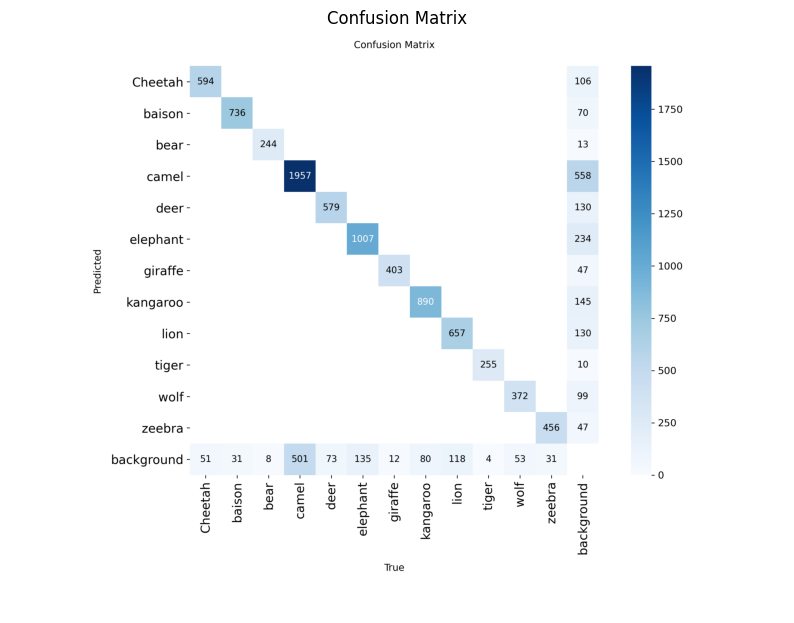

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

cm_path = "runs/detect/val/confusion_matrix.png"

img = mpimg.imread(cm_path)

plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.axis("off")
plt.title("Confusion Matrix")
plt.show()

Loaded: runs/detect/train/results.csv


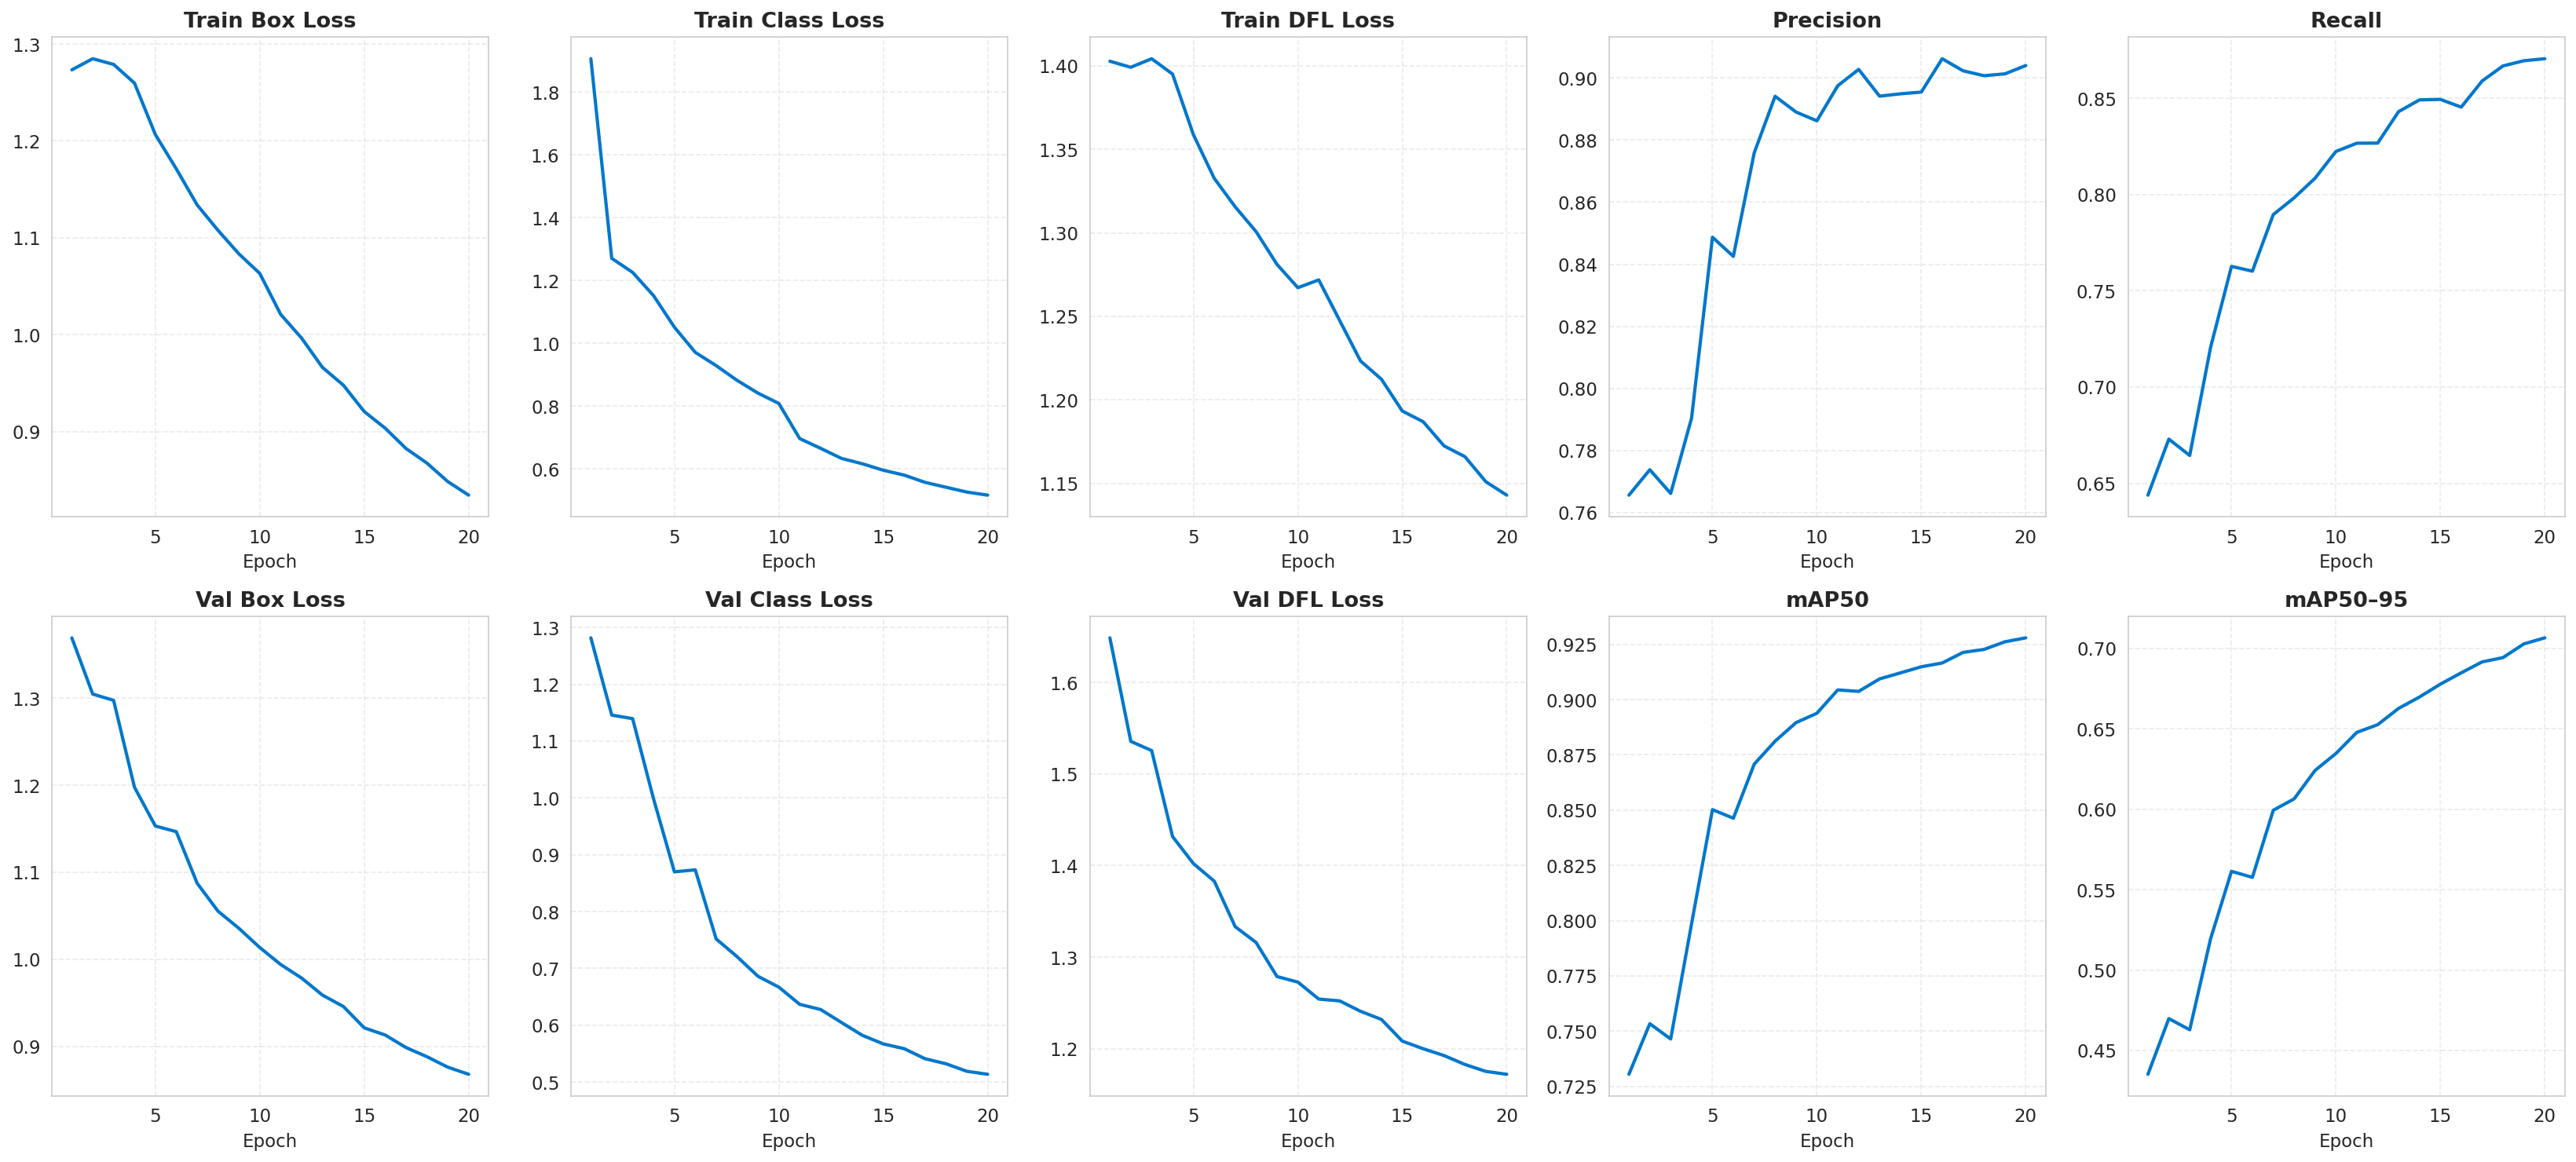

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# ----------------------------------------
# Load YOLO Training Results
# ----------------------------------------
csv_path = "runs/detect/train/results.csv"
df = pd.read_csv(csv_path)

print("Loaded:", csv_path)

# ----------------------------------------
# High-quality style
# ----------------------------------------
sns.set_style("whitegrid")
plt.rcParams["figure.dpi"] = 150
plt.rcParams["font.size"] = 11

# ----------------------------------------
# Metrics to plot
# ----------------------------------------
metrics_keys = [
    "train/box_loss", "train/cls_loss", "train/dfl_loss",
    "metrics/precision(B)", "metrics/recall(B)",
    "val/box_loss", "val/cls_loss", "val/dfl_loss",
    "metrics/mAP50(B)", "metrics/mAP50-95(B)"
]

titles = [
    "Train Box Loss", "Train Class Loss", "Train DFL Loss",
    "Precision", "Recall",
    "Val Box Loss", "Val Class Loss", "Val DFL Loss",
    "mAP50", "mAP50–95"
]

# ----------------------------------------
# Create 10-plot training curve grid
# ----------------------------------------
plt.figure(figsize=(22, 10))

for i, key in enumerate(metrics_keys):
    plt.subplot(2, 5, i+1)
    plt.plot(df["epoch"], df[key], linewidth=2, color="#0077CC")
    plt.title(titles[i], fontsize=13, fontweight="bold")
    plt.xlabel("Epoch")
    plt.grid(True, linestyle="--", alpha=0.4)

plt.tight_layout()
plt.show()